# Surface variability of fronts in the Southern Ocean

- Spectra in space of 
    - velocity
    - density
    - SST
- Histograms of Ro, Strain, divergence
- Spice


In [1]:
import dask
dask.config.set({"logging.distributed": "warning"})

In [2]:
# Setup cluster
from dask.distributed import Client, progress
from dask_kubernetes import KubeCluster
cluster = KubeCluster()
cluster.adapt(minimum=1, maximum=20)
client = Client(cluster)
client

AttributeError: 'NoneType' object has no attribute 'metadata'

In [1]:
# Load some useful modules 
import numpy as np
import xarray as xr
import xrft
import intake
from xmitgcm import llcreader
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import xgcm

In [3]:
font = {'family' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

In [4]:
from intake import open_catalog

cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/llc4320.yaml")

In [5]:
# Get variables from catalog
## load 
sst = cat.LLC4320_SST.to_dask()
sss = cat.LLC4320_SSS.to_dask()

u = cat.LLC4320_SSU.to_dask()
v = cat.LLC4320_SSV.to_dask()

In [ ]:
ds = xr.merge([sst, sss, u, v])
ds = llcreader.llcmodel.faces_dataset_to_latlon(ds, metric_vector_pairs=[])

In [ ]:
coords = cat.LLC4320_grid.to_dask().reset_coords()
coords = llcreader.llcmodel.faces_dataset_to_latlon(coords)

In [47]:
coords

<xarray.Dataset>
Dimensions:  (face: 13, i: 17280, i_g: 17280, j: 12960, j_g: 12960, k_p1: 2, time: 9030)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j        (j) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * j_g      (j_g) int64 0 1 2 3 4 5 6 ... 12954 12955 12956 12957 12958 12959
  * i_g      (i_g) int64 0 1 2 3 4 5 6 ... 17274 17275 17276 17277 17278 17279
  * k_p1     (k_p1) int64 0 1
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables:
    CS       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    Depth    (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    PHrefC   float32 15.4017
    PHrefF   (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    SN       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    XC       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    XG       (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    YC       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    YG       (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    Z        float32 -1.57
    Zl       float32 -1.0
    Zp1      (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    Zu       float32 -2.14
    drC      (k_p1) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    drF      float32 1.14
    hFacC    (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    hFacS    (j_g, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    hFacW    (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(9030,), meta=np.ndarray>
    k        int64 1
    k_l      int64 1
    k_u      int64 1
    rA       (j, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAs      (j_g, i) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAw      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    rAz      (j_g, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxC      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dyC      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>
    dyG      (j, i_g) float32 dask.array<chunksize=(4320, 4320), meta=np.ndarray>
    dxG      (j_g, i) float32 dask.array<chunksize=(1, 4320), meta=np.ndarray>

In [11]:
# Select region 

sel_reg = np.logical_and(np.logical_and(coords.XC>30, coords.XC<50 ), 
                           np.logical_and(coords.YC>-60, coords.YC<-45 ))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


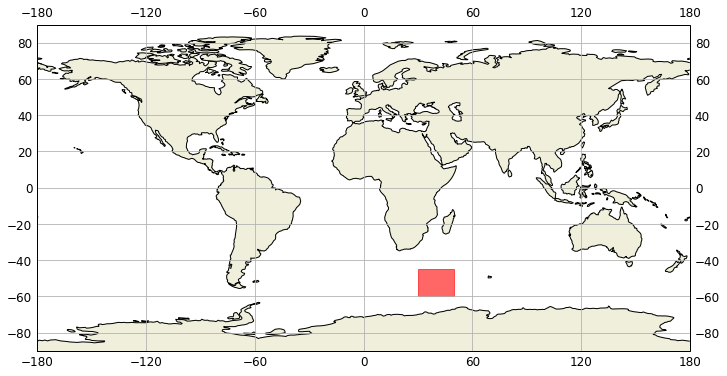

In [15]:
x_reg, y_reg = [30, 50, 50, 30, 30], [-60, -60, -45, -45, -60]

plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.fill(x_reg, y_reg, color='red', transform=ccrs.PlateCarree(), alpha=0.6)

ax.coastlines()
ax.set_boundary
ax.add_feature(cfeature.LAND)
ax.gridlines(draw_labels=True);

In [16]:
SST_sel = ds.SST.where(sel_reg, drop=True)
SSS_sel = ds.SSS.where(sel_reg, drop=True)

In [17]:
from fastjmd95 import rho
ds['SSD'] = xr.apply_ufunc(rho, 
                        ds.SSS, ds.SST, 0, 
                        dask='parallelized', output_dtypes=[float,]).rename('SSD')

In [18]:
SSD_sel = ds.SSD.where(sel_reg, drop=True)

In [33]:
U_sel = ds.U.isel(i_g=SST_sel.i.values, j=SST_sel.j.values)
V_sel = ds.V.isel(i=SST_sel.i.values, j_g=SST_sel.j.values)

In [48]:
# pick out the coordinates 

dxC_sel = coords.dxC.isel(i_g=SST_sel.i.values, j=SST_sel.j.values)
dyG_sel = coords.dyG.isel(i_g=SST_sel.i.values, j=SST_sel.j.values)
dyC_sel = coords.dyC.isel(i=SST_sel.i.values, j_g=SST_sel.j.values)
dxG_sel = coords.dxG.isel(i=SST_sel.i.values, j_g=SST_sel.j.values)
rA_sel = coords.rA.isel(i=SST_sel.i.values, j=SST_sel.j.values)
rAz_sel = coords.rAz.isel(i_g=SST_sel.i.values, j_g=SST_sel.j.values)
XC_sel = coords.XC.isel(i=SST_sel.i.values, j=SST_sel.j.values)
YC_sel = coords.YC.isel(i=SST_sel.i.values, j=SST_sel.j.values)

coords_sel = xr.merge([XC_sel, YC_sel, dxC_sel, dyC_sel, dxG_sel,
                      dyG_sel, rA_sel, rAz_sel])

In [34]:
ds_sel = xr.merge([U_sel, V_sel, SST_sel, SSS_sel, SSD_sel])

In [36]:
grid = xgcm.Grid(ds_sel, periodic=None)

In [49]:
rho_x = grid.interp(grid.diff(SSD_sel, 'X', boundary='extend')/coords_sel.dxC, 
                    'X',boundary='extend')
rho_y = grid.interp(grid.diff(SSD_sel, 'Y', boundary='extend')/coords_sel.dyC, 
                    'Y',boundary='extend')

In [50]:
grad_rho = np.abs(rho_x) + np.abs(rho_y) 
grad_rho

,Array,Chunk
Bytes,86.97 GB,7.45 MB
Shape,"(9030, 1254, 960)","(1, 972, 958)"
Count,3982731 Tasks,162540 Chunks
Type,float64,numpy.ndarray


In [51]:
zeta =   (-grid.diff(ds_sel.U * coords_sel.dxC, 'Y', boundary='extend') +
             grid.diff(ds_sel.V * coords_sel.dyC, 'X', boundary='extend')
         )/coords_sel.rAz

zeta = grid.interp(grid.interp(zeta, 'X', boundary='extend'),
                   'Y', boundary='extend')

In [53]:
temp_zeta = zeta.isel(time=0)
temp_zeta.load()

<xarray.DataArray 'mul-e3ee5ce68342da25883c758f9247e8d7' (j: 1254, i: 960)>
array([[ 4.6903074e-06,  5.2943333e-06,  2.0205405e-06, ...,
        -3.1521270e-06, -2.0950024e-06, -1.1489738e-06],
       [ 3.5216569e-06,  1.4578939e-06, -1.3970416e-06, ...,
        -3.2290704e-06, -2.3942866e-06, -1.6640817e-06],
       [ 8.2970917e-07,  2.1985670e-06,  3.9746583e-06, ...,
        -2.1186561e-06, -1.5022738e-06, -1.1458454e-06],
       ...,
       [ 6.7404108e-06,  3.2128523e-06,  1.0406294e-05, ...,
        -5.8881496e-06, -8.4824078e-06, -5.9392746e-06],
       [ 9.6118611e-06,  4.5054207e-06,  3.7395766e-06, ...,
        -1.2720906e-05, -7.1243717e-06,  6.5803533e-07],
       [ 1.0668482e-05,  6.0434854e-06,  1.6265715e-06, ...,
        -1.7280781e-05, -4.4000280e-06,  6.8669774e-06]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-09-13
  * j        (j) int64 4040 4041 4042 4043 4044 ... 5289 5290 5291 5292 5293
  * i        (i) int64 3264 3265 3266 3267 3268 ... 4219 4220 4221 4222 4223

In [55]:
temp = grad_rho.isel(time=1000)
temp.load()

<xarray.DataArray (j: 1254, i: 960)>
array([[2.05710848e-06, 3.99442026e-06, 5.16935187e-06, ...,
        2.19515187e-06, 1.77296965e-06, 1.30597059e-06],
       [2.93895915e-06, 5.12880117e-06, 6.43668760e-06, ...,
        4.05062652e-06, 3.68471242e-06, 3.11984822e-06],
       [3.15346280e-06, 5.51662368e-06, 6.79758518e-06, ...,
        4.63453825e-06, 4.40945044e-06, 4.04097251e-06],
       ...,
       [9.08472072e-06, 9.78919032e-06, 2.02620040e-05, ...,
        2.34571311e-06, 2.16182102e-06, 1.53960513e-06],
       [4.32358690e-06, 1.07112489e-05, 2.88190313e-05, ...,
        3.07159443e-06, 2.43981227e-06, 1.72774049e-06],
       [3.74964402e-06, 8.82757093e-06, 3.41931600e-05, ...,
        2.35996770e-06, 1.66646527e-06, 1.23312932e-06]])
Coordinates:
    time     datetime64[ns] 2011-10-24T16:00:00
  * j        (j) int64 4040 4041 4042 4043 4044 ... 5289 5290 5291 5292 5293
  * i        (i) int64 3264 3265 3266 3267 3268 ... 4219 4220 4221 4222 4223

In [59]:
XCmean = coords_sel.XC.mean('j')
YCmean = coords_sel.YC.mean('i')

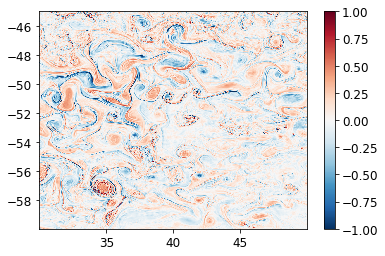

In [62]:
plt.pcolormesh(XCmean, YCmean, temp_zeta/1e-4, 
               vmin=-1, vmax=1, cmap='RdBu_r')
plt.colorbar()

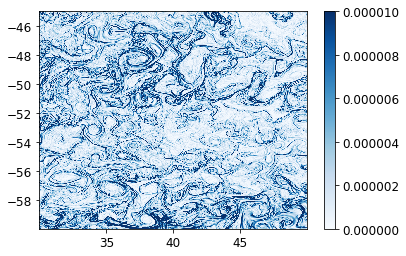

In [66]:
plt.pcolormesh(XCmean, YCmean, temp, 
               vmin=0, vmax=1e-5, cmap='Blues')
plt.colorbar()

In [100]:
SST_seasonal = ds_sel.SST.isel(time=slice(0,24*370, 24*10), i=slice(0,None,10), j=slice(0,None,10)
                             ).groupby("time.month").mean().mean(['i','j'])
SSD_seasonal = ds_sel.SSD.isel(time=slice(0,24*370, 24*10), i=slice(0,None,10), j=slice(0,None,10)
                             ).groupby("time.month").mean().mean(['i','j'])

In [103]:
SST_seasonal.load();

distributed.scheduler - ERROR - Couldn't gather keys {"('mean_agg-aggregate-df4e873b76fd28dccbbfe7e5338dce50', 7)": [], "('mean_agg-aggregate-df4e873b76fd28dccbbfe7e5338dce50', 6)": []} state: ['waiting', 'waiting'] workers: []
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('mean_agg-aggregate-df4e873b76fd28dccbbfe7e5338dce50', 7)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: [], ('mean_agg-aggregate-df4e873b76fd28dccbbfe7e5338dce50', 6)
NoneType: None
distributed.client - WARNING - Couldn't gather 2 keys, rescheduling {"('mean_agg-aggregate-df4e873b76fd28dccbbfe7e5338dce50', 7)": (), "('mean_agg-aggregate-df4e873b76fd28dccbbfe7e5338dce50', 6)": ()}


<xarray.DataArray 'SST' (month: 12)>
array([3.7253578, 4.26575  , 4.1346316, 3.5916665, 2.9644072, 2.3683593,
       1.9683328, 1.7364403, 1.497351 , 1.5406746, 1.9983342, 2.844146 ],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [105]:
SSD_seasonal.load();

KilledWorker: ("('getitem-zarr-concatenate-5afd0abf711aa6b145137a023dc71c1e', 4320, 1, 0)", <Worker 'tcp://10.32.22.19:44911', memory: 0, processing: 18>)

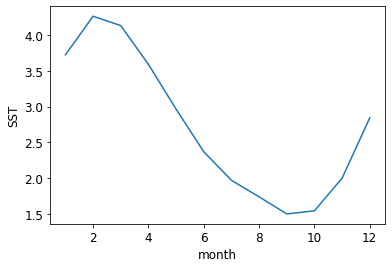

In [112]:
SST_seasonal.plot()

### Spectra

In [68]:
# density
SSD_k_ps = xrft.power_spectrum(ds_sel['SSD'], 
                               dim=['i'],
                               window=True, 
                               detrend='constant').rename('SSD_psd')

In [73]:
# KE 
U_k_ps = xrft.power_spectrum(grid.interp(ds_sel['U'],'X',boundary='extend').chunk({'i':960}), 
                               dim=['i'],
                               window=True, 
                               detrend='constant').rename('U_psd')

V_k_ps = xrft.power_spectrum(grid.interp(ds_sel['V'],'Y',boundary='extend'), 
                               dim=['i'],
                               window=True, 
                               detrend='constant').rename('V_psd')

In [74]:
EKE_k_ps = (0.5*(U_k_ps + V_k_ps)).rename('EKE_psd')

In [75]:
EKE_ps_FMA = EKE_k_ps.isel(time=slice(0,24*370, 24*10)
                             ).groupby("time.month").mean().mean('j'
                             ).sel(month=slice(2,4)).mean('month')

In [109]:
EKE_ps_OND = EKE_k_ps.isel(time=slice(0,24*370, 24*10)
                             ).groupby("time.month").mean().mean('j'
                             ).sel(month=slice(10,12)).mean('month')
EKE_ps_OND.load();

In [110]:
EKE_ps_AMJ = EKE_k_ps.isel(time=slice(0,24*370, 24*10)
                             ).groupby("time.month").mean().mean('j'
                             ).sel(month=slice(4,6)).mean('month')
EKE_ps_AMJ.load();

In [76]:
EKE_ps_JAS = EKE_k_ps.isel(time=slice(0,24*370, 24*10)
                             ).groupby("time.month").mean().mean('j'
                             ).sel(month=slice(7,9)).mean('month')

In [78]:
EKE_ps_FMA.load();

<xarray.DataArray 'EKE_psd' (freq_i: 960)>
array([1.98957906e-07, 2.02252682e-07, 2.03697337e-07, 2.02510060e-07,
       2.10095904e-07, 2.13184717e-07, 2.03342143e-07, 2.03482818e-07,
       2.06466894e-07, 2.09713998e-07, 2.14381322e-07, 2.15344978e-07,
       2.07846178e-07, 2.04213840e-07, 2.14343438e-07, 2.17430937e-07,
       2.15198509e-07, 2.15378660e-07, 2.16314819e-07, 2.20649252e-07,
       2.18288831e-07, 2.16690804e-07, 2.22007894e-07, 2.19924957e-07,
       2.23846342e-07, 2.22800607e-07, 2.30557633e-07, 2.39644709e-07,
       2.40365034e-07, 2.41417730e-07, 2.41356396e-07, 2.44212682e-07,
       2.43429780e-07, 2.48235552e-07, 2.53739816e-07, 2.57148528e-07,
       2.64092825e-07, 2.65599815e-07, 2.68047841e-07, 2.70296927e-07,
       2.69755533e-07, 2.68882594e-07, 2.84870616e-07, 2.88050388e-07,
       2.85640149e-07, 2.93031341e-07, 3.06567558e-07, 3.08475905e-07,
       3.05595518e-07, 3.09845656e-07, 3.20104002e-07, 3.26607820e-07,
       3.22104028e-07, 3.23539881e-07, 3.28661486e-07, 3.33513424e-07,
       3.41663762e-07, 3.53900481e-07, 3.63582825e-07, 3.65203140e-07,
       3.66338497e-07, 3.70835272e-07, 3.82334170e-07, 3.87435611e-07,
       3.97683620e-07, 4.03356972e-07, 4.11217202e-07, 4.17489121e-07,
       4.27426812e-07, 4.31349009e-07, 4.31014344e-07, 4.37852153e-07,
       4.53965226e-07, 4.60795677e-07, 4.55368821e-07, 4.68638182e-07,
       4.91299511e-07, 5.06493085e-07, 5.10617801e-07, 5.25191203e-07,
       5.44997484e-07, 5.44614494e-07, 5.51026198e-07, 5.74320379e-07,
       5.91634735e-07, 6.05343192e-07, 6.06212499e-07, 6.12963812e-07,
       6.24319555e-07, 6.36004238e-07, 6.37221386e-07, 6.48921322e-07,
       6.59416093e-07, 6.88404483e-07, 7.21886306e-07, 7.36662786e-07,
       7.50681843e-07, 7.62787528e-07, 7.62686742e-07, 7.68882916e-07,
       8.03749984e-07, 8.16227986e-07, 8.46841676e-07, 8.58400792e-07,
       8.66594314e-07, 8.77428293e-07, 9.21792659e-07, 9.58783335e-07,
       9.50098818e-07, 9.64433164e-07, 9.85893853e-07, 1.03207114e-06,
       1.05295345e-06, 1.10861045e-06, 1.14873434e-06, 1.14038970e-06,
       1.14936004e-06, 1.20697850e-06, 1.24195438e-06, 1.24274016e-06,
       1.26348440e-06, 1.29630217e-06, 1.32465933e-06, 1.32649958e-06,
       1.39332691e-06, 1.49834578e-06, 1.53963223e-06, 1.55965999e-06,
       1.60509863e-06, 1.61548631e-06, 1.62582398e-06, 1.66921770e-06,
       1.74549068e-06, 1.77407872e-06, 1.81180035e-06, 1.85557818e-06,
       1.86616799e-06, 1.90298492e-06, 1.95861844e-06, 2.03131371e-06,
       2.08482754e-06, 2.11458088e-06, 2.14979663e-06, 2.24067830e-06,
       2.29844699e-06, 2.40177035e-06, 2.46106477e-06, 2.45385398e-06,
       2.49936051e-06, 2.62424432e-06, 2.67161471e-06, 2.78015575e-06,
       2.78204173e-06, 2.86582433e-06, 2.99882556e-06, 3.07222125e-06,
       3.15189930e-06, 3.18091395e-06, 3.27445272e-06, 3.46976164e-06,
       3.47133083e-06, 3.55280115e-06, 3.72576995e-06, 3.80570454e-06,
       3.92686546e-06, 3.93255162e-06, 4.08164743e-06, 4.28526507e-06,
       4.42620899e-06, 4.56700393e-06, 4.66459612e-06, 4.66085692e-06,
       4.78837736e-06, 4.91247171e-06, 4.96095057e-06, 5.17045831e-06,
       5.25661748e-06, 5.43014684e-06, 5.53926552e-06, 5.65492438e-06,
       5.77969692e-06, 5.95821226e-06, 6.25958382e-06, 6.43012125e-06,
       6.54225128e-06, 6.69848843e-06, 6.76055770e-06, 7.20181643e-06,
       7.42258418e-06, 7.35608691e-06, 7.56868689e-06, 7.86647120e-06,
       8.11890553e-06, 8.19142733e-06, 8.39371926e-06, 8.60693700e-06,
       9.08368848e-06, 9.48404432e-06, 9.57071539e-06, 1.00249119e-05,
       9.94832070e-06, 1.00505506e-05, 1.02049731e-05, 1.05636152e-05,
       1.06677398e-05, 1.10782590e-05, 1.16075280e-05, 1.19929514e-05,
       1.24681584e-05, 1.26556479e-05, 1.31188217e-05, 1.36071469e-05,
       1.42908959e-05, 1.43340824e-05, 1.41726352e-05, 1.44095613e-05,
       1.49728171e-05, 1.56587572e-05, 1.59220922e-05, 1.64167690e-05,
       1.66101144e-05, 1.68467814e-05, 1.70122700e-0

In [79]:
EKE_ps_JAS.load();

<xarray.DataArray 'EKE_psd' (freq_i: 960)>
array([2.77948429e-07, 2.67845511e-07, 2.58969399e-07, 2.60303148e-07,
       2.66373580e-07, 2.65341053e-07, 2.66497048e-07, 2.70994322e-07,
       2.70012404e-07, 2.72458653e-07, 2.71759449e-07, 2.70938439e-07,
       2.71906095e-07, 2.74608196e-07, 2.72775210e-07, 2.78294420e-07,
       2.91152285e-07, 2.86995094e-07, 2.77742784e-07, 2.78959528e-07,
       2.84417246e-07, 2.88567973e-07, 2.85964938e-07, 2.83621763e-07,
       2.88895131e-07, 2.93724685e-07, 2.99402020e-07, 3.09756942e-07,
       3.15137248e-07, 3.14698603e-07, 3.15868206e-07, 3.28825101e-07,
       3.34361167e-07, 3.36684290e-07, 3.35232446e-07, 3.44075812e-07,
       3.44376549e-07, 3.48353044e-07, 3.62208838e-07, 3.70274928e-07,
       3.79816137e-07, 3.89815679e-07, 3.94230627e-07, 3.99137372e-07,
       4.04795601e-07, 4.00241311e-07, 4.03375157e-07, 4.30881518e-07,
       4.45024979e-07, 4.41365194e-07, 4.40023665e-07, 4.53768244e-07,
       4.62729189e-07, 4.66207460e-07, 4.79208900e-07, 4.96565744e-07,
       4.94876271e-07, 5.04299099e-07, 5.14525076e-07, 5.19791431e-07,
       5.28578975e-07, 5.27684264e-07, 5.34249469e-07, 5.57411634e-07,
       5.71328923e-07, 5.67513860e-07, 5.78967743e-07, 6.07959448e-07,
       6.22090372e-07, 6.41678517e-07, 6.50096611e-07, 6.53645550e-07,
       6.72551291e-07, 6.83066778e-07, 6.87725006e-07, 6.88806899e-07,
       7.06397173e-07, 7.44524410e-07, 7.68490791e-07, 7.77341693e-07,
       7.95161235e-07, 8.20702766e-07, 8.42714502e-07, 8.56775671e-07,
       8.54571746e-07, 8.86308389e-07, 9.22878425e-07, 9.44076712e-07,
       9.43903261e-07, 9.54529140e-07, 9.70236588e-07, 1.01169692e-06,
       1.02215256e-06, 1.03568503e-06, 1.06849916e-06, 1.10797112e-06,
       1.17305658e-06, 1.18541682e-06, 1.18342504e-06, 1.24212864e-06,
       1.23138251e-06, 1.29063475e-06, 1.34979023e-06, 1.36198105e-06,
       1.41678783e-06, 1.43633226e-06, 1.46023631e-06, 1.47306379e-06,
       1.50063690e-06, 1.57159831e-06, 1.64015666e-06, 1.65538484e-06,
       1.67513418e-06, 1.73283362e-06, 1.79973896e-06, 1.85047509e-06,
       1.88178369e-06, 1.93279252e-06, 1.96414588e-06, 2.04421815e-06,
       2.14347268e-06, 2.16095510e-06, 2.21216449e-06, 2.30418696e-06,
       2.34474070e-06, 2.43046066e-06, 2.44752305e-06, 2.45611807e-06,
       2.59830548e-06, 2.66223320e-06, 2.65810889e-06, 2.82681509e-06,
       2.97417835e-06, 3.01791008e-06, 3.03692633e-06, 3.10675591e-06,
       3.17762942e-06, 3.28841925e-06, 3.48227768e-06, 3.54434314e-06,
       3.50863700e-06, 3.57297281e-06, 3.73953311e-06, 3.79897088e-06,
       3.87744932e-06, 3.88919292e-06, 4.09474315e-06, 4.24364239e-06,
       4.25566985e-06, 4.34701167e-06, 4.58990068e-06, 4.67196206e-06,
       4.79394038e-06, 4.90001780e-06, 5.01231504e-06, 5.26719029e-06,
       5.42880649e-06, 5.46150110e-06, 5.65835192e-06, 5.87067575e-06,
       6.00225245e-06, 5.96114578e-06, 6.11425561e-06, 6.40127561e-06,
       6.57586575e-06, 6.84837611e-06, 7.05401898e-06, 7.12071623e-06,
       7.23126844e-06, 7.40426695e-06, 7.61001246e-06, 7.68404696e-06,
       7.91725074e-06, 8.30859298e-06, 8.70380416e-06, 8.97755396e-06,
       9.09486106e-06, 9.29956571e-06, 9.25323359e-06, 9.67803416e-06,
       1.02098833e-05, 1.05073675e-05, 1.04968988e-05, 1.05106387e-05,
       1.09569617e-05, 1.13258392e-05, 1.13705918e-05, 1.16756094e-05,
       1.21513623e-05, 1.28520056e-05, 1.32277666e-05, 1.35696245e-05,
       1.36239761e-05, 1.41929228e-05, 1.42117358e-05, 1.43367003e-05,
       1.49213271e-05, 1.53486056e-05, 1.57301164e-05, 1.63137931e-05,
       1.69230379e-05, 1.74749083e-05, 1.73247459e-05, 1.73737717e-05,
       1.80039044e-05, 1.84184720e-05, 1.89143681e-05, 1.96955398e-05,
       2.02905844e-05, 2.10224457e-05, 2.13831444e-05, 2.14186191e-05,
       2.26025685e-05, 2.32356903e-05, 2.36189132e-05, 2.44175022e-05,
       2.50887092e-05, 2.54503953e-05, 2.59933209e-05, 2.63089519e-05,
       2.74796191e-05, 2.75112492e-05, 2.85595684e-0

In [91]:
dx = (110*(coords_sel.XC.isel(i=1) - 
            coords_sel.XC.isel(i=0))*np.cos(
            coords_sel.YC.mean('i')*np.pi/180)).mean('j')

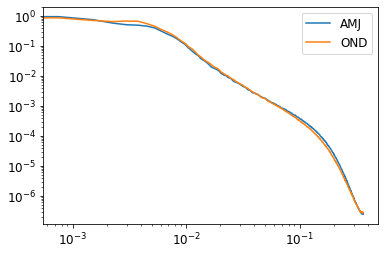

In [111]:
k = EKE_ps_FMA.freq_i/dx

plt.plot(k, EKE_ps_AMJ, label='AMJ')
plt.plot(k, EKE_ps_OND, label='OND')

plt.xscale('log')
plt.yscale('log')
plt.legend()